<a href="https://colab.research.google.com/github/ambernguyen0222/BME3053C-Spring-2025/blob/main/Homeworks/HW8_nguyenamber.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MNIST Digit Classification
##### In this assignment, you will work with the [MNIST handwritten digits dataset](http://yann.lecun.com/exdb/mnist/) to implement and compare two supervised learning algorithms: Logistic Regression and Neural Networks. You will gain hands-on experience with data preprocessing, model training, evaluation, and visualization techniques commonly used in machine learning.


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

try:
    from sklearn.datasets import fetch_openml
    from sklearn.model_selection import train_test_split
    from sklearn.linear_model import LogisticRegression
    from sklearn.preprocessing import StandardScaler
    from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
    from sklearn.neural_network import MLPClassifier
    import seaborn as sns
except ImportError as e:
    import subprocess
    import sys

    print(f"Missing package: {str(e).split()[-1]}")
    print("Installing required packages...")
    %pip install scikit-learn
    %pip install seaborn


### Part 1: Data Loading and Exploration (4 points)
1. Load the MNIST dataset using fetch_openml
2. Print the following dataset characteristics:
   - Dataset dimensions and size
   - Number of classes
3. Visualize sample digits from the dataset


In [4]:
#Provide your code for part 1-1 here
from sklearn.datasets import fetch_openml

# Load the MNIST dataset
mnist = fetch_openml('mnist_784', version=1, as_frame=False)

# Extract data and labels
X, y = mnist.data, mnist.target

In [5]:
#Provide your code for part 1-2 here
# Print dataset dimensions and size
print(f"Dataset dimensions: {X.shape}")
print(f"Number of samples: {X.shape[0]}")
print(f"Number of features: {X.shape[1]}")
print(f"Number of classes: {len(set(y))}")

Dataset dimensions: (70000, 784)
Number of samples: 70000
Number of features: 784
Number of classes: 10


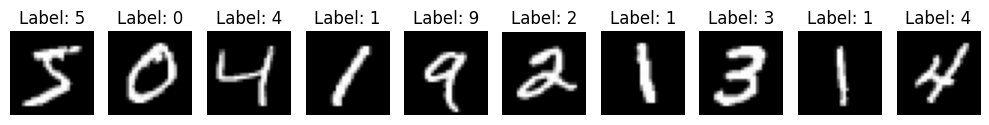

In [6]:
#Provide your code for part 1-3 here
# Visualize sample digits from the dataset
fig, axes = plt.subplots(1, 10, figsize=(10, 3))
for i, ax in enumerate(axes):
    ax.imshow(X[i].reshape(28, 28), cmap='gray')
    ax.axis('off')
    ax.set_title(f"Label: {y[i]}")
plt.tight_layout()
plt.show()

### Part 2: Data Preprocessing (4 points)
1. Scale the pixel values to range [0,1] by dividing by 255
2. Split the data into training (80%) and testing (20%) sets
3. Create a StandardScaler object and fit it on the training data
4. Transform both training and test data using the fitted scaler
5. Print the shapes of the resulting training and test sets


In [7]:
# Provide your code for part 2 here
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# 1. Scale the pixel values to range [0,1] by dividing by 255
X = X / 255.0

# 2. Split the data into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Create a StandardScaler object and fit it on the training data
scaler = StandardScaler()
scaler.fit(X_train)

# 4. Transform both training and test data using the fitted scaler
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 5. Print the shapes of the resulting training and test sets
print(f"Training set shape: {X_train_scaled.shape}")
print(f"Test set shape: {X_test_scaled.shape}")

Training set shape: (56000, 784)
Test set shape: (14000, 784)


### Part 3: Model Training and Evaluation (8 points)
1. Train a Logistic Regression model using the training data. Use the default parameters.
2. Train a Neural Network model using the training data. The neural network should have 2 hidden layers with 100 and 50 neurons respectively. Use the Adam optimizer and a learning rate of 0.001.

In [8]:
# Provide your code for part 3-1 here

# 1. Train a Logistic Regression model using the training data
logistic_model = LogisticRegression(max_iter=1000, random_state=42)
logistic_model.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred_logistic = logistic_model.predict(X_test_scaled)

# Calculate accuracy
logistic_accuracy = accuracy_score(y_test, y_pred_logistic)
print(f"Logistic Regression Accuracy: {logistic_accuracy:.4f}")



Logistic Regression Accuracy: 0.9154


In [9]:
# Provide your code for part 3-2 here
# 2. Train a Neural Network model using the training data
nn_model = MLPClassifier(hidden_layer_sizes=(100, 50), solver='adam', learning_rate_init=0.001, max_iter=200, random_state=42)
nn_model.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred_nn = nn_model.predict(X_test_scaled)

# Calculate accuracy
nn_accuracy = accuracy_score(y_test, y_pred_nn)
print(f"Neural Network Accuracy: {nn_accuracy:.4f}")

Neural Network Accuracy: 0.9712


### Part 4: Model Comparison and Visualization (4 points)
1. Use a bar plot to compare the accuracy of both models on the test data
2. Print the classification report and confusion matrix for both models
3. Visualize the misclassified examples for both models


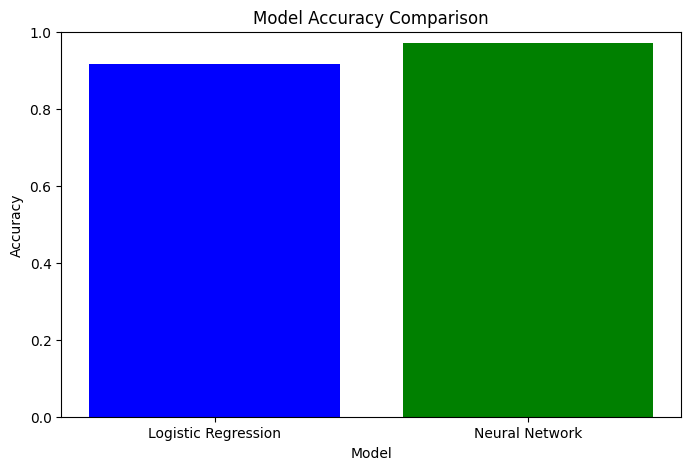

In [10]:
# Provide your code for part 4-1 here

# Accuracy values for both models
model_names = ['Logistic Regression', 'Neural Network']
accuracies = [logistic_accuracy, nn_accuracy]

# Create a bar plot
plt.figure(figsize=(8, 5))
plt.bar(model_names, accuracies, color=['blue', 'green'])
plt.ylim(0, 1)  # Set y-axis range to [0, 1]
plt.title('Model Accuracy Comparison')
plt.ylabel('Accuracy')
plt.xlabel('Model')
plt.show()

In [11]:
# Provide your code for part 4-2 here
from sklearn.metrics import classification_report, confusion_matrix

# Classification report and confusion matrix for Logistic Regression
print("Logistic Regression Classification Report:")
print(classification_report(y_test, y_pred_logistic))

print("Logistic Regression Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_logistic))

# Classification report and confusion matrix for Neural Network
print("\nNeural Network Classification Report:")
print(classification_report(y_test, y_pred_nn))

print("Neural Network Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_nn))

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.96      0.96      1343
           1       0.94      0.97      0.96      1600
           2       0.90      0.89      0.90      1380
           3       0.90      0.89      0.89      1433
           4       0.92      0.92      0.92      1295
           5       0.88      0.88      0.88      1273
           6       0.93      0.94      0.94      1396
           7       0.92      0.94      0.93      1503
           8       0.90      0.86      0.88      1357
           9       0.89      0.90      0.90      1420

    accuracy                           0.92     14000
   macro avg       0.91      0.91      0.91     14000
weighted avg       0.92      0.92      0.92     14000

Logistic Regression Confusion Matrix:
[[1283    1   10    0    1   14   22    4    6    2]
 [   0 1555    6    9    3    5    1    4   14    3]
 [   5   19 1234   18   13   14   21   16   28   12]
 

Misclassified examples for Logistic Regression:


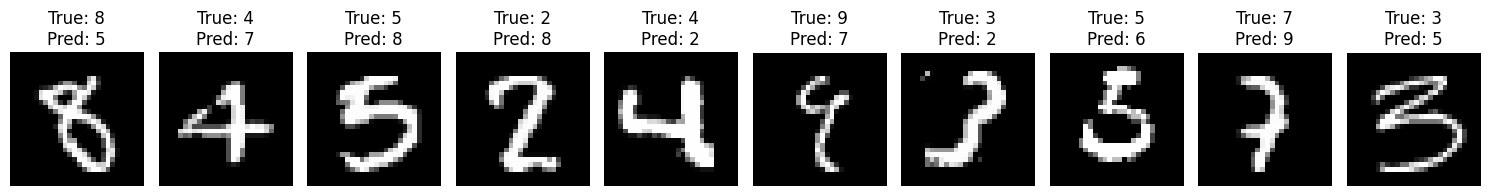

Misclassified examples for Neural Network:


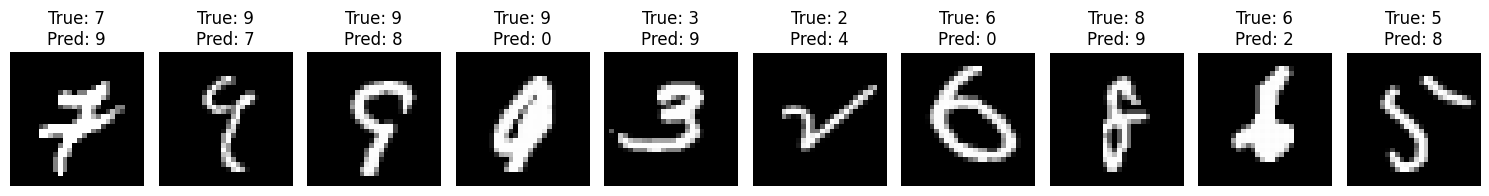

In [12]:
# Provide your code for part 4-3 here
# Visualize misclassified examples for Logistic Regression
print("Misclassified examples for Logistic Regression:")
misclassified_logistic = (y_test != y_pred_logistic)
fig, axes = plt.subplots(1, 10, figsize=(15, 4))
for i, ax in enumerate(axes):
    if i >= sum(misclassified_logistic):  # Stop if there are fewer than 10 misclassified examples
        break
    idx = [j for j, val in enumerate(misclassified_logistic) if val][i]
    ax.imshow(X_test[idx].reshape(28, 28), cmap='gray')
    ax.axis('off')
    ax.set_title(f"True: {y_test[idx]}\nPred: {y_pred_logistic[idx]}")
plt.tight_layout()
plt.show()

# Visualize misclassified examples for Neural Network
print("Misclassified examples for Neural Network:")
misclassified_nn = (y_test != y_pred_nn)
fig, axes = plt.subplots(1, 10, figsize=(15, 4))
for i, ax in enumerate(axes):
    if i >= sum(misclassified_nn):  # Stop if there are fewer than 10 misclassified examples
        break
    idx = [j for j, val in enumerate(misclassified_nn) if val][i]
    ax.imshow(X_test[idx].reshape(28, 28), cmap='gray')
    ax.axis('off')
    ax.set_title(f"True: {y_test[idx]}\nPred: {y_pred_nn[idx]}")
plt.tight_layout()
plt.show()